# PART-1

## Name: Anushk Naval  Roll:18046

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [3]:
def relu(x):
    return np.maximum(x, np.zeros(len(x)))

## **Data import and formatting**

In [4]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


**History function**

In [5]:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

### Use Keras to build a network with a single hidden layer and at least 300,000 trainable parameters.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


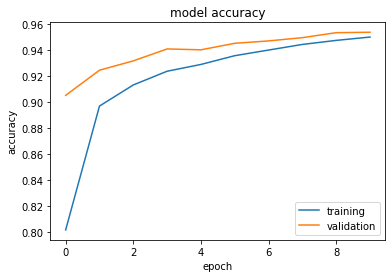

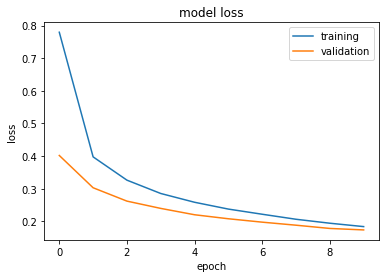

Test loss: 0.201
Test accuracy: 0.942
Time for training the model: 9.926180839538574 sec


In [6]:
model = Sequential()
model.add(Dense(units=400, activation='sigmoid', input_shape=(image_size,)))


model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

start = time.time()
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
end = time.time()

plot_training_history(history, model)
print('Time for training the model:',end - start,'sec')

**For training data**

In [7]:
model.fit(training_data, training_labels, batch_size=128, epochs=10,validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1736 - accuracy: 0.9525 - val_loss: 0.1680 - val_accuracy: 0.9552
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1655 - accuracy: 0.9552 - val_loss: 0.1627 - val_accuracy: 0.9563
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1575 - accuracy: 0.9581 - val_loss: 0.1566 - val_accuracy: 0.9582
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9601 - val_loss: 0.1536 - val_accuracy: 0.9603
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1436 - accuracy: 0.9626 - val_loss: 0.1517 - val_accuracy: 0.9595
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1379 - accuracy: 0.9637 - val_loss: 0.1472 - val_accuracy: 0.9605
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9664 - val_loss: 0.1450 - val_accuracy: 0.9617
Epoch 

**For test data**

In [8]:
model.fit(test_data, test_labels, batch_size=128, epochs=10)

Epoch 1/10
79/79 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9535
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9610
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9640
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.9672
Epoch 5/10
79/79 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.9707
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9733
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9747
Epoch 8/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9769
Epoch 9/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9785
Epoch 10/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9796


####  Answer the following questions about this model:

Q. How many total trainable parameters does this model have?
    
    a) How many weights?
    b) How many biases?

Ans.   For input layer:
            
            Weights = 784*400 = 3,13,600      Bias = 400
      
      For output layer:
            
            Weights = 400*10 = 4000           Bias = 10
            
      Total parameters = Net weights + net bias  = 3,17,600 + 410 = 3,18,610

Q. How accurate was this model on the validation data after 10 epochs?
  
    a) How different was the model's performance on the training data?
    b) How different was the model's performance on the test data?

Ans. After 10 epochs model accuracry was: 94.20%
    
      a. For training data the loss varied from 0.1680 to 0.1378 and accuracy varied from 95.52% to 96.45%
      b. For training data the loss varied from 0.1588 to 0.0889 and accuracy varied from 95.35% to 97.96%

Q. About how long did each epoch take?

Ans. Each epoch took approx 2ms

### Use Keras to build a network with a single hidden layer at fewer than 50,000 trainable parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                47100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________


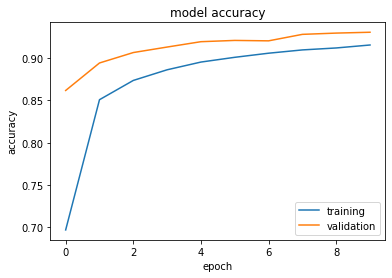

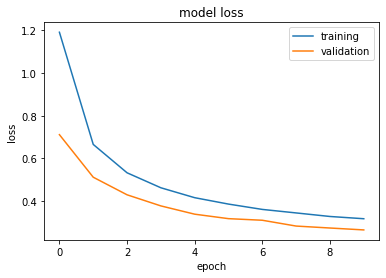

Test loss: 0.311
Test accuracy: 0.917
Time for training the model: 3.403113842010498 sec


In [9]:
model = Sequential()
model.add(Dense(units=60, activation='sigmoid', input_shape=(image_size,)))


model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

start = time.time()
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
end = time.time()

plot_training_history(history, model)
print('Time for training the model:',end - start,'sec')

**For training data**

In [10]:
model.fit(training_data, training_labels, batch_size=128, epochs=10, validation_split=.1)

Epoch 1/10
422/422 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.9178 - val_loss: 0.2541 - val_accuracy: 0.9355
Epoch 2/10
422/422 [==============================] - 0s 956us/step - loss: 0.2946 - accuracy: 0.9210 - val_loss: 0.2424 - val_accuracy: 0.9367
Epoch 3/10
422/422 [==============================] - 0s 946us/step - loss: 0.2851 - accuracy: 0.9222 - val_loss: 0.2405 - val_accuracy: 0.9377
Epoch 4/10
422/422 [==============================] - 0s 937us/step - loss: 0.2771 - accuracy: 0.9260 - val_loss: 0.2327 - val_accuracy: 0.9380
Epoch 5/10
422/422 [==============================] - 0s 984us/step - loss: 0.2719 - accuracy: 0.9261 - val_loss: 0.2257 - val_accuracy: 0.9413
Epoch 6/10
422/422 [==============================] - 0s 984us/step - loss: 0.2648 - accuracy: 0.9285 - val_loss: 0.2180 - val_accuracy: 0.9447
Epoch 7/10
422/422 [==============================] - 0s 980us/step - loss: 0.2575 - accuracy: 0.9299 - val_loss: 0.2188 - val_accuracy: 0

**For test data**

In [11]:
model.fit(test_data, test_labels, batch_size=128, epochs=10)

Epoch 1/10
79/79 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.9308
Epoch 2/10
79/79 [==============================] - 0s 925us/step - loss: 0.2456 - accuracy: 0.9321
Epoch 3/10
79/79 [==============================] - 0s 915us/step - loss: 0.2352 - accuracy: 0.9354
Epoch 4/10
79/79 [==============================] - 0s 939us/step - loss: 0.2310 - accuracy: 0.9373
Epoch 5/10
79/79 [==============================] - 0s 915us/step - loss: 0.2274 - accuracy: 0.9381
Epoch 6/10
79/79 [==============================] - 0s 914us/step - loss: 0.2244 - accuracy: 0.9373
Epoch 7/10
79/79 [==============================] - 0s 916us/step - loss: 0.2173 - accuracy: 0.9405
Epoch 8/10
79/79 [==============================] - 0s 945us/step - loss: 0.2218 - accuracy: 0.9414
Epoch 9/10
79/79 [==============================] - 0s 997us/step - loss: 0.2184 - accuracy: 0.9416
Epoch 10/10
79/79 [==============================] - 0s 917us/step - loss: 0.2118 - accuracy: 0.9420


####  Answer the following questions about this model:

Q. How many total trainable parameters does this model have?
    
    a) How many weights?
    b) How many biases?

Ans.   For input layer:
            
            Weights = 784*60 = 47,040      Bias = 60
      
      For output layer:
            
            Weights = 60*10 = 600          Bias = 10
            
      Total parameters = Net weights + net bias  = 47,640 + 70 = 47,710

Q. How accurate was this model on the validation data after 10 epochs?
  
    a) How different was the model's performance on the training data?
    b) How different was the model's performance on the test data?

Ans. After 10 epochs model accuracry was: 91.70%
    
      a. For training data the loss varied from 0.3058 to 0.2422 and accuracy varied from 91.78% to 93.41%
      b. For training data the loss varied from 0.2474 to 0.2118 and accuracy varied from 93.08% to 94.20%

Q. About how long did each epoch take?

Ans. Each epoch took approx 1ms

# PART-2

Use Keras to build 3 networks, each with at least 10 hidden layers such that:

* The first model has fewer than 10 nodes per layer.
* The second model has between 10-50 nodes per layer.
* The third model has between 50-100 nodes per layer.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 9)                 7065      
_________________________________________________________________
dense_41 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_42 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_43 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_44 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_45 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_46 (Dense)             (None, 9)                

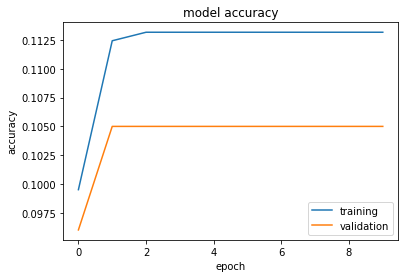

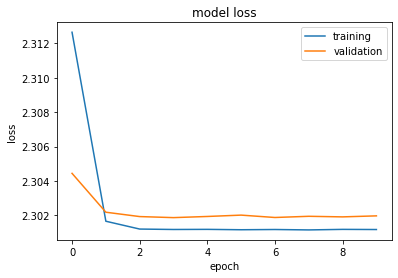

Test loss: 2.3
Test accuracy: 0.113


In [16]:
model_1 = Sequential()

model_1.add(Dense(units=9, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model_1.add(Dense(units=9, activation='sigmoid'))

model_1.add(Dense(units=num_classes, activation='softmax'))
model_1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

history = model_1.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model_1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 49)                38465     
_________________________________________________________________
dense_53 (Dense)             (None, 49)                2450      
_________________________________________________________________
dense_54 (Dense)             (None, 49)                2450      
_________________________________________________________________
dense_55 (Dense)             (None, 49)                2450      
_________________________________________________________________
dense_56 (Dense)             (None, 49)                2450      
_________________________________________________________________
dense_57 (Dense)             (None, 49)                2450      
_________________________________________________________________
dense_58 (Dense)             (None, 49)               

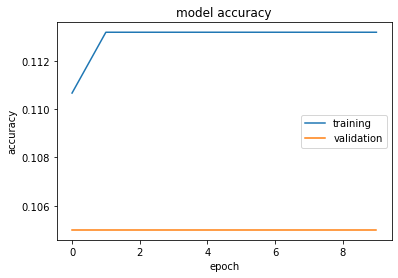

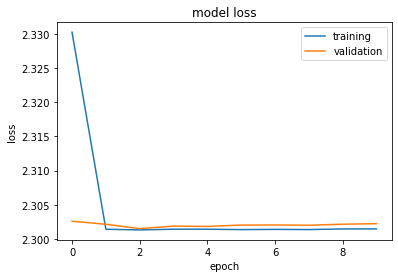

Test loss: 2.3
Test accuracy: 0.113


In [17]:
model_2 = Sequential()

model_2.add(Dense(units=49, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model_2.add(Dense(units=49, activation='sigmoid'))

model_2.add(Dense(units=num_classes, activation='softmax'))
model_2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

history = model_2.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model_2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 99)                77715     
_________________________________________________________________
dense_65 (Dense)             (None, 99)                9900      
_________________________________________________________________
dense_66 (Dense)             (None, 99)                9900      
_________________________________________________________________
dense_67 (Dense)             (None, 99)                9900      
_________________________________________________________________
dense_68 (Dense)             (None, 99)                9900      
_________________________________________________________________
dense_69 (Dense)             (None, 99)                9900      
_________________________________________________________________
dense_70 (Dense)             (None, 99)               

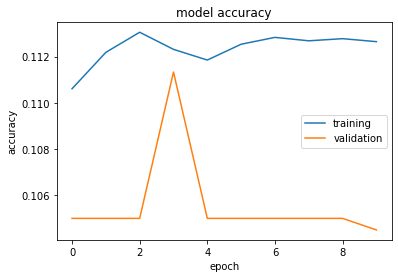

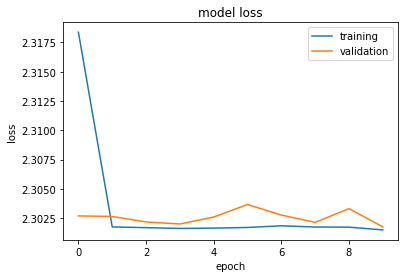

Test loss: 2.3
Test accuracy: 0.101


In [18]:
model_3 = Sequential()

model_3.add(Dense(units=99, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model_3.add(Dense(units=99, activation='sigmoid'))

model_3.add(Dense(units=num_classes, activation='softmax'))
model_3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

history = model_3.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model_3)

**Answer these questions:**

Q. Did any of these models achieve better than 20% accuracy on validation or test data?
  * State a hypothesis about why these networks performed the way they did.

Ans. No model got accuracy above 20%

* Hypothesis:
        
        With increase in parameters there is increase in the accuracy of models, if hidden layers were increased very much it can cause overfitting decreasing the accuracy as we have seen in above models causing graph to flatten.

Q. How many total trainable parameters do each of these models have?

Ans. 
* Model 1: 8,065
* Model 2: 63,465
* Model 3: 177,715

Q. Is there a clear correlation between number of trainable parameters and accuracy?
  * Consider your results from part one in answering this question.

Ans. Yes, with increase in number of parameters accuracy do increase provided the model have sufficient hidden layers.

* Considering result from part 1 with increase in number of trainable parameters the accuracy increased as 1 layer is sufficient but in part 2 due to overfitting there is a decrease in accuracy of the model

# PART-3

Build a network with at least 3 hidden layers that achieves better than 92% accuracy on validation and test data. You may need to train for more than 10 epochs to achieve this result.

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_97 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_98 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_99 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_100 (Dense)            (None, 10)                4010      
Total params: 799,210
Trainable params: 799,210
Non-trainable params: 0
_________________________________________________________________


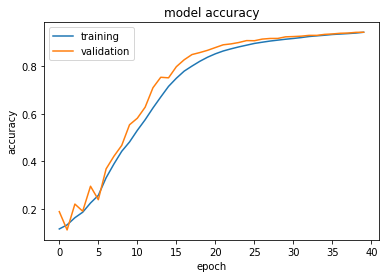

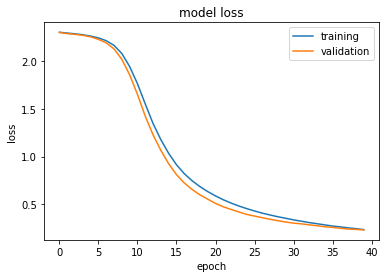

Test loss: 0.276
Test accuracy: 0.93
Time for training the model: 66.88518786430359 sec


In [23]:
model_p3 = Sequential()

model_p3.add(Dense(units=400, activation='sigmoid', input_shape=(image_size,)))

for _ in range(3):
    model_p3.add(Dense(units=400, activation='sigmoid'))

model_p3.add(Dense(units=num_classes, activation='softmax'))
model_p3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_p3.summary()

start = time.time()
history = model_p3.fit(training_data, training_labels, batch_size=128, epochs=40, verbose=False, validation_split=.1)
end = time.time()

plot_training_history(history, model_p3)
print('Time for training the model:',end - start,'sec')

**Answer to question**

Q. Compare your best results to the result you got in part one:
* Which network achieved the best accuracy on test data after training?
* Did the networks train for a similar number of epochs?

Ans. 
* Network in part 1 perforemed better with with accuracy of 92.4% and 10 sec runtime than part 2 with 93% accuracy with 67 sec runtime.
* The epoch were not similar as model in part-1 took 10 and part-3 took 35 epoch